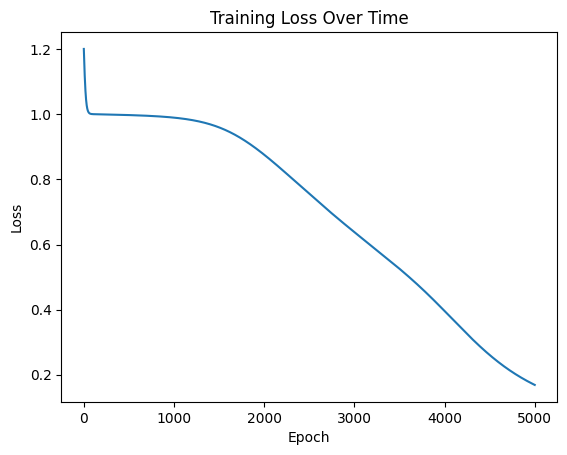

Input: [0 0], Prediction: 0.0
Input: [0 1], Prediction: 1.0
Input: [1 0], Prediction: 1.0
Input: [1 1], Prediction: 0.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the Neural Network for XOR
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.theta1 = np.random.rand(hidden_size, input_size)
        self.theta2 = np.random.rand(output_size, hidden_size)
        np.random.seed(314)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_run(self, input):
        z1 = np.dot(self.theta1, input)
        a1 = self.sigmoid(z1)
        z2 = np.dot(self.theta2, a1)
        a2 = self.sigmoid(z2)
        return a2, a1

    def back_propagate(self, input, output, a2, a1, learning_rate):
        error = output - a2
        delta2 = error * self.sigmoid_derivative(a2)
        d_theta2 = np.dot(delta2, a1.T)

        delta1 = np.dot(self.theta2.T, delta2) * self.sigmoid_derivative(a1)
        d_theta1 = np.dot(delta1, input.T)

        self.theta2 += learning_rate * d_theta2
        self.theta1 += learning_rate * d_theta1

    def train(self, input, output, learning_rate, epochs):
        losses = []
        for epoch in range(epochs):
            a2, a1 = self.forward_run(input)
            self.back_propagate(input, output, a2, a1, learning_rate)
            loss = np.sum((output - a2) ** 2)
            losses.append(loss)

        plt.plot(losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Time')
        plt.show()

    def predict(self, input):
        a2, _ = self.forward_run(input)
        return np.round(a2)

# XOR Training Data
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
outputs = np.array([0, 1, 1, 0])

# Network Parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 5000

# Initialize and Train the Network
nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(inputs, outputs, learning_rate, epochs)

# Testing the Neural Network
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
for i in range(test_inputs.shape[1]):
    input = test_inputs[:, [i]]
    prediction = nn.predict(input)
    print(f"Input: {input.flatten()}, Prediction: {prediction.flatten()[0]}")



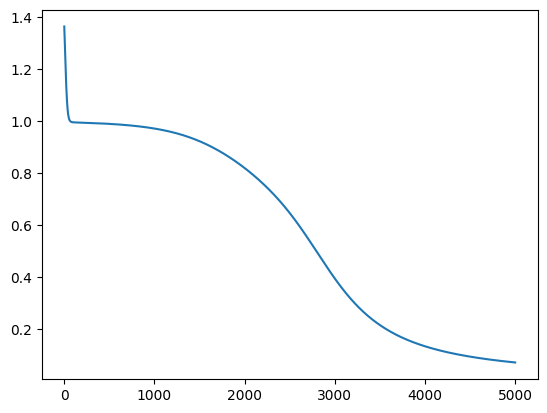

test_input (2, 1)
a2 [0.17389991 0.87481648 0.87474287 0.10490341]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class XORNeuralNetwork:
    def __init__(self, n1=4, n2=1, feature_num=2, input_num=4, learning_rate=0.1, epoch_num=5000):
        self.n1 = n1
        self.n2 = n2
        self.feature_num = feature_num
        self.input_num = input_num
        self.learning_rate = learning_rate
        self.epoch_num = epoch_num

        self.Input_arry = np.array([[0,0],[0,1],[1,0],[1,1]]).T
        self.Output_array = np.array([0,1,1,0]).reshape(n2, input_num)

        np.random.seed(314)
        self.theta1 = np.random.rand(n1, feature_num)
        self.theta2 = np.random.rand(n2, n1)

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def sigmoid_der(self, x):
        return self.sigmoid(x)*(1-self.sigmoid(x))

    def forward_run(self):
        z1 = np.dot(self.theta1, self.Input_arry)
        a1 = self.sigmoid(z1)
        z2 = np.dot(self.theta2, a1)
        a2 = self.sigmoid(z2)
        return a2, z2, a1, z1

    def loss(self, y):
        return np.sum((y-self.Output_array) ** 2)

    def loss_der(self, y):
        return (y-self.Output_array)

    def back_prop(self, a2, z2, a1, z1):
        z2_der = self.loss_der(a2)*self.sigmoid_der(z2)
        diff_theta2 = np.dot(z2_der, a1.T)
        a1_der = np.dot(self.theta2.T, z2_der)
        z1_der = a1_der*self.sigmoid_der(z1)
        diff_theta1 = np.dot(z1_der, self.Input_arry.T)
        return diff_theta1, diff_theta2

    def train(self):
        Loss = []
        for _ in range(self.epoch_num):
            a2, z2, a1, z1 = self.forward_run()
            loss_val = self.loss(a2)
            d_theta1, d_theta2 = self.back_prop(a2, z2, a1, z1)
            self.theta2 = self.theta2 - self.learning_rate * d_theta2
            self.theta1 = self.theta1 - self.learning_rate * d_theta1
            Loss.append(loss_val)
        plt.plot(Loss)
        plt.show()

    def predict(self, input):
        a2, _, _, _ = self.forward_run()
        a2 = np.squeeze(a2)
        print("a2", a2)
        if a2 >= 0.5:
            print("For input", [i[0] for i in input], "output is 1")
        else:
            print("For input", [i[0] for i in input], "output is 0")

# Test the XOR gate
nn = XORNeuralNetwork()
nn.train()
test_input = np.array([[0,0]]).T
print("test_input", test_input.shape)
nn.predict(test_input)

In [ ]:
import unittest
import XORNeuralNetwork  # Import your neural network class

class TestXORNeuralNetwork(unittest.TestCase):

    def setUp(self):
        self.nn = XORNeuralNetwork()  # Initialize the neural network

    def test_forward_run(self):
        # Test the forward_run method
        output, _, _, _ = self.nn.forward_run()
        self.assertEqual(output.shape, (self.nn.n2, self.nn.input_num))

    def test_loss(self):
        # Test the loss method
        _, _, _, _ = self.nn.forward_run()
        loss_value = self.nn.loss(self.nn.Output_array)
        self.assertIsInstance(loss_value, float)

    def test_back_prop(self):
        # Test the back_prop method
        a2, z2, a1, z1 = self.nn.forward_run()
        d_theta1, d_theta2 = self.nn.back_prop(a2, z2, a1, z1)
        self.assertEqual(d_theta1.shape, self.nn.theta1.shape)
        self.assertEqual(d_theta2.shape, self.nn.theta2.shape)

    def test_predict(self):
        # Test the predict method
        test_input = np.array([[0,0]]).T
        prediction = self.nn.predict(test_input)
        self.assertIn(prediction, [0, 1])

if __name__ == '__main__':
    unittest.main()
